In [12]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)

In [13]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"


# list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
# for event in list_evO1O2:
#     print(event)
#     filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples



# list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
#                            "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
# for event in list(list_evO3a):
#     if event != '190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/GW{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples


# list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
#               "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
# for event in list(list_evO3b):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples



# with open("events.pkl", 'wb') as handle:
#     pickle.dump(posterior_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [14]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [16]:
population_model = "PBH-power-2nd"
cosmology_model = 'flatLCDM'
outdir = f'./results/H0_GWTC-3_{population_model}_{cosmology_model}_final/'
injections.update_cut(snr_cut=9, ifar_cut=0) 

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [17]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict


{'α': Uniform(minimum=1.05, maximum=4.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'M': Uniform(minimum=3.0, maximum=10.0, name='$M$', latex_label='$M$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

22:46 bilby INFO    : Running for label 'dynesty', output will be saved to './results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final/'
22:46 bilby INFO    : Search parameters:
22:46 bilby INFO    :   α = Uniform(minimum=1.05, maximum=4.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
22:46 bilby INFO    :   M = Uniform(minimum=3.0, maximum=10.0, name='$M$', latex_label='$M$', unit=None, boundary=None)
22:46 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
22:46 bilby INFO    :   H0 = 67.4
22:46 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:175: RuntimeWarning: divide by zero encountered in log
22:48 bilby INFO    : Single likelihood evaluation took 1.134e+00 s


0it [00:00, ?it/s]

22:48 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fe50fffd0d0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
22:48 bilby INFO    : Checkpoint every check_point_delta_t = 60s
22:48 bilby INFO    : Using dynesty version 1.0.1
22:48 bilby INFO    : Using the bilby-implemented rwalk sampl

611it [17:31,  6.11it/s, bound:0 nc:  7 ncall:2.5e+03 eff:24.6% logz=-1986.72+/-0.16 dlogz:216.570>0.1]   

23:06 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


871it [18:53,  2.33it/s, bound:0 nc: 14 ncall:4.5e+03 eff:19.2% logz=-1899.73+/-0.15 dlogz:128.532>0.1]

23:07 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1023it [20:18,  1.02s/it, bound:0 nc:  9 ncall:6.5e+03 eff:15.6% logz=-1870.70+/-0.15 dlogz:99.145>0.1] 

23:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1153it [21:40,  1.46it/s, bound:0 nc: 23 ncall:8.6e+03 eff:13.4% logz=-1850.20+/-0.15 dlogz:78.418>0.1]

23:10 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1268it [23:02,  1.07it/s, bound:0 nc: 27 ncall:1.1e+04 eff:11.9% logz=-1834.51+/-0.15 dlogz:62.417>0.1]

23:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1361it [24:23,  1.09it/s, bound:0 nc:  5 ncall:1.3e+04 eff:10.8% logz=-1825.60+/-0.15 dlogz:53.319>0.1]

23:13 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1432it [26:15,  5.96s/it, bound:1 nc: 38 ncall:1.4e+04 eff:10.0% logz=-1818.88+/-0.15 dlogz:46.413>0.1]

23:14 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1490it [27:30,  1.58s/it, bound:6 nc: 27 ncall:1.6e+04 eff:9.2% logz=-1815.05+/-0.15 dlogz:42.468>0.1] 

23:16 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1547it [28:56,  1.62s/it, bound:12 nc: 37 ncall:1.8e+04 eff:8.6% logz=-1811.51+/-0.15 dlogz:38.825>0.1]

23:17 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1604it [30:21,  1.63s/it, bound:18 nc: 21 ncall:2.0e+04 eff:8.0% logz=-1808.68+/-0.15 dlogz:35.856>0.1]

23:18 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1661it [31:47,  1.66s/it, bound:24 nc: 32 ncall:2.2e+04 eff:7.6% logz=-1806.16+/-0.15 dlogz:33.216>0.1]

23:20 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1720it [33:14,  1.66s/it, bound:31 nc: 33 ncall:2.4e+04 eff:7.2% logz=-1803.80+/-0.15 dlogz:30.741>0.1]

23:21 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1778it [34:47,  1.73s/it, bound:38 nc: 34 ncall:2.6e+04 eff:6.8% logz=-1801.71+/-0.15 dlogz:28.534>0.1]

23:23 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1839it [36:16,  1.66s/it, bound:44 nc: 38 ncall:2.8e+04 eff:6.5% logz=-1799.53+/-0.15 dlogz:26.227>0.1]

23:24 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1898it [37:54,  1.79s/it, bound:51 nc:106 ncall:3.0e+04 eff:6.3% logz=-1797.65+/-0.15 dlogz:24.229>0.1]

23:26 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1958it [39:25,  1.67s/it, bound:58 nc: 37 ncall:3.3e+04 eff:6.0% logz=-1796.05+/-0.15 dlogz:22.509>0.1]

23:28 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2017it [40:53,  1.61s/it, bound:65 nc: 37 ncall:3.5e+04 eff:5.8% logz=-1794.35+/-0.15 dlogz:20.971>0.1]

23:29 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2075it [42:20,  1.56s/it, bound:72 nc: 40 ncall:3.7e+04 eff:5.6% logz=-1793.00+/-0.15 dlogz:19.497>0.1]

23:30 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2134it [43:48,  1.51s/it, bound:79 nc: 37 ncall:3.9e+04 eff:5.4% logz=-1791.65+/-0.15 dlogz:18.040>0.1]

23:32 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2196it [45:16,  1.53s/it, bound:86 nc: 40 ncall:4.2e+04 eff:5.3% logz=-1790.15+/-0.15 dlogz:16.414>0.1]

23:33 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2257it [46:45,  1.53s/it, bound:94 nc: 40 ncall:4.4e+04 eff:5.1% logz=-1788.75+/-0.15 dlogz:14.881>0.1]

23:35 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2316it [48:16,  1.55s/it, bound:102 nc: 40 ncall:4.7e+04 eff:5.0% logz=-1787.73+/-0.15 dlogz:13.748>0.1]

23:36 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2375it [49:46,  1.63s/it, bound:110 nc: 40 ncall:4.9e+04 eff:4.8% logz=-1786.82+/-0.15 dlogz:12.714>0.1]

23:38 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2432it [51:17,  1.65s/it, bound:117 nc: 40 ncall:5.1e+04 eff:4.7% logz=-1785.92+/-0.15 dlogz:11.705>0.1]

23:39 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2491it [52:48,  1.57s/it, bound:125 nc: 40 ncall:5.4e+04 eff:4.6% logz=-1785.14+/-0.15 dlogz:10.798>0.1]

23:41 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2552it [54:19,  1.58s/it, bound:133 nc: 39 ncall:5.6e+04 eff:4.5% logz=-1784.46+/-0.15 dlogz:9.996>0.1] 

23:42 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2583it [55:26,  1.91s/it, bound:137 nc: 40 ncall:5.8e+04 eff:4.5% logz=-1784.14+/-0.15 dlogz:9.618>0.1]

23:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2614it [56:46,  2.24s/it, bound:141 nc: 40 ncall:5.9e+04 eff:4.4% logz=-1783.84+/-0.15 dlogz:9.250>0.1]

23:45 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2645it [58:06,  2.70s/it, bound:144 nc: 40 ncall:6.0e+04 eff:4.4% logz=-1783.53+/-0.15 dlogz:8.880>0.1]

23:46 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2674it [59:26,  3.00s/it, bound:148 nc: 40 ncall:6.1e+04 eff:4.4% logz=-1783.25+/-0.15 dlogz:8.546>0.1]

23:48 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2705it [1:00:46,  2.96s/it, bound:152 nc: 40 ncall:6.3e+04 eff:4.3% logz=-1782.98+/-0.15 dlogz:8.208>0.1]

23:49 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2734it [1:02:07,  2.96s/it, bound:156 nc: 40 ncall:6.4e+04 eff:4.3% logz=-1782.73+/-0.15 dlogz:7.896>0.1]

23:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2763it [1:03:28,  2.88s/it, bound:160 nc: 40 ncall:6.5e+04 eff:4.2% logz=-1782.48+/-0.15 dlogz:7.680>0.1]

23:52 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2794it [1:04:50,  3.13s/it, bound:164 nc: 40 ncall:6.6e+04 eff:4.2% logz=-1782.24+/-0.15 dlogz:7.528>0.1]

23:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2825it [1:06:13,  3.19s/it, bound:167 nc: 40 ncall:6.8e+04 eff:4.2% logz=-1782.02+/-0.15 dlogz:7.243>0.1]

23:54 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2854it [1:07:34,  3.19s/it, bound:171 nc: 40 ncall:6.9e+04 eff:4.1% logz=-1781.82+/-0.15 dlogz:6.980>0.1]

23:56 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2885it [1:08:54,  2.98s/it, bound:175 nc: 40 ncall:7.0e+04 eff:4.1% logz=-1781.60+/-0.15 dlogz:6.705>0.1]

23:57 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2915it [1:10:16,  2.90s/it, bound:179 nc: 40 ncall:7.1e+04 eff:4.1% logz=-1781.40+/-0.15 dlogz:6.440>0.1]

23:58 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2945it [1:11:36,  3.18s/it, bound:183 nc: 80 ncall:7.3e+04 eff:4.1% logz=-1781.20+/-0.15 dlogz:6.185>0.1]

00:00 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2974it [1:12:56,  3.29s/it, bound:187 nc: 40 ncall:7.4e+04 eff:4.0% logz=-1781.03+/-0.15 dlogz:5.953>0.1]

00:01 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3003it [1:14:17,  3.28s/it, bound:191 nc: 40 ncall:7.5e+04 eff:4.0% logz=-1780.87+/-0.15 dlogz:5.734>0.1]

00:02 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3034it [1:15:40,  3.08s/it, bound:194 nc: 40 ncall:7.6e+04 eff:4.0% logz=-1780.70+/-0.15 dlogz:5.508>0.1]

00:04 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3064it [1:17:01,  2.94s/it, bound:198 nc: 40 ncall:7.7e+04 eff:4.0% logz=-1780.55+/-0.15 dlogz:5.298>0.1]

00:05 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3093it [1:18:21,  3.26s/it, bound:202 nc: 40 ncall:7.9e+04 eff:3.9% logz=-1780.40+/-0.15 dlogz:5.093>0.1]

00:07 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3124it [1:19:47,  3.35s/it, bound:206 nc: 40 ncall:8.0e+04 eff:3.9% logz=-1780.26+/-0.15 dlogz:4.884>0.1]

00:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3154it [1:21:09,  3.29s/it, bound:210 nc: 40 ncall:8.1e+04 eff:3.9% logz=-1780.12+/-0.16 dlogz:4.686>0.1]

00:09 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3185it [1:22:34,  3.15s/it, bound:214 nc: 40 ncall:8.2e+04 eff:3.9% logz=-1779.97+/-0.16 dlogz:4.484>0.1]

00:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3215it [1:23:56,  3.01s/it, bound:218 nc: 40 ncall:8.4e+04 eff:3.8% logz=-1779.84+/-0.16 dlogz:4.295>0.1]

00:12 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3245it [1:25:19,  2.88s/it, bound:222 nc: 40 ncall:8.5e+04 eff:3.8% logz=-1779.71+/-0.16 dlogz:4.108>0.1]

00:13 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3273it [1:26:42,  3.29s/it, bound:225 nc: 40 ncall:8.6e+04 eff:3.8% logz=-1779.60+/-0.16 dlogz:3.941>0.1]

00:15 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:15 bilby INFO    : Writing 117 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3302it [1:28:07,  3.40s/it, bound:229 nc: 40 ncall:8.7e+04 eff:3.8% logz=-1779.49+/-0.16 dlogz:3.774>0.1]

00:16 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:16 bilby INFO    : Writing 123 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3333it [1:29:30,  3.19s/it, bound:233 nc: 40 ncall:8.9e+04 eff:3.8% logz=-1779.37+/-0.16 dlogz:3.604>0.1]

00:18 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:18 bilby INFO    : Writing 118 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3363it [1:30:53,  3.09s/it, bound:237 nc: 40 ncall:9.0e+04 eff:3.7% logz=-1779.27+/-0.16 dlogz:3.446>0.1]

00:19 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:19 bilby INFO    : Writing 114 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3393it [1:32:16,  2.94s/it, bound:241 nc: 40 ncall:9.1e+04 eff:3.7% logz=-1779.17+/-0.16 dlogz:3.293>0.1]

00:20 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:20 bilby INFO    : Writing 155 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3422it [1:33:39,  3.26s/it, bound:245 nc: 40 ncall:9.2e+04 eff:3.7% logz=-1779.08+/-0.16 dlogz:3.151>0.1]

00:22 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:22 bilby INFO    : Writing 141 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3453it [1:35:01,  3.24s/it, bound:249 nc: 40 ncall:9.4e+04 eff:3.7% logz=-1778.99+/-0.16 dlogz:3.006>0.1]

00:23 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:23 bilby INFO    : Writing 155 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3483it [1:36:23,  3.19s/it, bound:252 nc: 40 ncall:9.5e+04 eff:3.7% logz=-1778.91+/-0.16 dlogz:2.887>0.1]

00:25 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:25 bilby INFO    : Writing 139 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3512it [1:37:46,  3.15s/it, bound:256 nc: 40 ncall:9.6e+04 eff:3.7% logz=-1778.83+/-0.16 dlogz:2.760>0.1]

00:26 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:26 bilby INFO    : Writing 155 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3542it [1:39:08,  2.98s/it, bound:260 nc: 40 ncall:9.7e+04 eff:3.6% logz=-1778.76+/-0.16 dlogz:2.634>0.1]

00:27 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:27 bilby INFO    : Writing 190 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3572it [1:40:33,  3.31s/it, bound:264 nc: 40 ncall:9.9e+04 eff:3.6% logz=-1778.69+/-0.16 dlogz:2.513>0.1]

00:29 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:29 bilby INFO    : Writing 190 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3602it [1:42:02,  3.43s/it, bound:268 nc: 40 ncall:1.0e+05 eff:3.6% logz=-1778.62+/-0.16 dlogz:2.397>0.1]

00:30 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:30 bilby INFO    : Writing 222 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3630it [1:43:22,  3.39s/it, bound:272 nc:120 ncall:1.0e+05 eff:3.6% logz=-1778.56+/-0.16 dlogz:2.291>0.1]

00:32 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:32 bilby INFO    : Writing 214 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3660it [1:44:48,  3.26s/it, bound:276 nc: 40 ncall:1.0e+05 eff:3.6% logz=-1778.50+/-0.16 dlogz:2.182>0.1]

00:33 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:33 bilby INFO    : Writing 207 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3691it [1:46:11,  2.99s/it, bound:280 nc: 40 ncall:1.0e+05 eff:3.6% logz=-1778.44+/-0.16 dlogz:2.073>0.1]

00:34 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:34 bilby INFO    : Writing 262 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3722it [1:47:35,  3.26s/it, bound:283 nc: 40 ncall:1.0e+05 eff:3.6% logz=-1778.38+/-0.16 dlogz:1.968>0.1]

00:36 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:36 bilby INFO    : Writing 255 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3753it [1:48:57,  3.27s/it, bound:287 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1778.32+/-0.16 dlogz:1.894>0.1]

00:37 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:37 bilby INFO    : Writing 270 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3782it [1:50:21,  3.36s/it, bound:291 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1778.27+/-0.16 dlogz:1.803>0.1]

00:39 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:39 bilby INFO    : Writing 276 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3811it [1:51:44,  3.26s/it, bound:295 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1778.22+/-0.16 dlogz:1.715>0.1]

00:40 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:40 bilby INFO    : Writing 302 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3842it [1:53:08,  3.03s/it, bound:299 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1778.18+/-0.16 dlogz:1.626>0.1]

00:41 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:41 bilby INFO    : Writing 305 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3872it [1:54:32,  2.91s/it, bound:303 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1778.13+/-0.16 dlogz:1.542>0.1]

00:43 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:43 bilby INFO    : Writing 348 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3902it [1:55:56,  3.19s/it, bound:307 nc: 80 ncall:1.1e+05 eff:3.5% logz=-1778.09+/-0.16 dlogz:1.463>0.1]

00:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:44 bilby INFO    : Writing 370 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3931it [1:57:23,  3.34s/it, bound:310 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1778.05+/-0.16 dlogz:1.389>0.1]

00:46 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:46 bilby INFO    : Writing 406 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3961it [1:58:54,  3.37s/it, bound:314 nc: 40 ncall:1.1e+05 eff:3.5% logz=-1778.01+/-0.16 dlogz:1.315>0.1]

00:47 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:47 bilby INFO    : Writing 411 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3992it [2:00:20,  3.14s/it, bound:318 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.97+/-0.16 dlogz:1.243>0.1]

00:48 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:48 bilby INFO    : Writing 412 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4022it [2:01:45,  2.99s/it, bound:322 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.94+/-0.16 dlogz:1.177>0.1]

00:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:50 bilby INFO    : Writing 470 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4052it [2:03:13,  3.31s/it, bound:326 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.90+/-0.16 dlogz:1.113>0.1]

00:51 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:51 bilby INFO    : Writing 478 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4081it [2:04:39,  3.45s/it, bound:330 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.87+/-0.16 dlogz:1.054>0.1]

00:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:53 bilby INFO    : Writing 509 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4110it [2:06:06,  3.42s/it, bound:333 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.84+/-0.16 dlogz:0.999>0.1]

00:54 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:54 bilby INFO    : Writing 534 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4140it [2:07:34,  3.27s/it, bound:337 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.82+/-0.16 dlogz:0.944>0.1]

00:56 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:56 bilby INFO    : Writing 525 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4168it [2:09:00,  3.22s/it, bound:341 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.79+/-0.16 dlogz:0.895>0.1]

00:57 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:57 bilby INFO    : Writing 635 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4199it [2:10:30,  3.46s/it, bound:345 nc: 40 ncall:1.2e+05 eff:3.4% logz=-1777.76+/-0.16 dlogz:0.843>0.1]

00:59 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
00:59 bilby INFO    : Writing 637 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4230it [2:12:01,  3.50s/it, bound:349 nc: 40 ncall:1.3e+05 eff:3.4% logz=-1777.74+/-0.16 dlogz:0.794>0.1]

01:00 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:00 bilby INFO    : Writing 676 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4259it [2:13:32,  3.52s/it, bound:353 nc: 40 ncall:1.3e+05 eff:3.4% logz=-1777.72+/-0.16 dlogz:0.751>0.1]

01:02 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:02 bilby INFO    : Writing 720 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4289it [2:15:02,  3.39s/it, bound:357 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1777.69+/-0.16 dlogz:0.709>0.1]

01:03 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:03 bilby INFO    : Writing 778 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4320it [2:16:32,  3.19s/it, bound:361 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1777.67+/-0.16 dlogz:0.667>0.1]

01:05 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:05 bilby INFO    : Writing 863 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4349it [2:18:04,  3.61s/it, bound:364 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1777.65+/-0.16 dlogz:0.630>0.1]

01:06 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:06 bilby INFO    : Writing 916 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4379it [2:19:31,  3.60s/it, bound:368 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1777.63+/-0.16 dlogz:0.594>0.1]

01:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:08 bilby INFO    : Writing 917 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4409it [2:20:59,  3.48s/it, bound:372 nc: 40 ncall:1.3e+05 eff:3.3% logz=-1777.62+/-0.16 dlogz:0.559>0.1]

01:09 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:09 bilby INFO    : Writing 958 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4437it [2:22:26,  3.43s/it, bound:376 nc: 80 ncall:1.3e+05 eff:3.3% logz=-1777.60+/-0.16 dlogz:0.529>0.1]

01:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:11 bilby INFO    : Writing 1047 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4467it [2:23:52,  3.20s/it, bound:380 nc: 40 ncall:1.4e+05 eff:3.3% logz=-1777.58+/-0.16 dlogz:0.498>0.1]

01:12 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:12 bilby INFO    : Writing 1053 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4494it [2:25:19,  3.20s/it, bound:384 nc: 80 ncall:1.4e+05 eff:3.3% logz=-1777.57+/-0.16 dlogz:0.472>0.1]

01:13 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:13 bilby INFO    : Writing 1210 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4524it [2:26:47,  3.46s/it, bound:388 nc: 40 ncall:1.4e+05 eff:3.3% logz=-1777.55+/-0.16 dlogz:0.444>0.1]

01:15 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:15 bilby INFO    : Writing 1226 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4553it [2:28:18,  3.58s/it, bound:391 nc: 40 ncall:1.4e+05 eff:3.3% logz=-1777.54+/-0.16 dlogz:0.419>0.1]

01:16 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:16 bilby INFO    : Writing 1317 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4583it [2:29:45,  3.38s/it, bound:395 nc: 40 ncall:1.4e+05 eff:3.3% logz=-1777.53+/-0.16 dlogz:0.395>0.1]

01:18 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:18 bilby INFO    : Writing 1391 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4611it [2:31:10,  3.31s/it, bound:399 nc: 40 ncall:1.4e+05 eff:3.2% logz=-1777.51+/-0.16 dlogz:0.375>0.1]

01:19 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:19 bilby INFO    : Writing 1439 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4639it [2:32:34,  3.15s/it, bound:403 nc: 40 ncall:1.4e+05 eff:3.2% logz=-1777.50+/-0.16 dlogz:0.354>0.1]

01:21 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:21 bilby INFO    : Writing 1553 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4667it [2:34:00,  3.50s/it, bound:407 nc: 40 ncall:1.4e+05 eff:3.2% logz=-1777.49+/-0.16 dlogz:0.339>0.1]

01:22 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:22 bilby INFO    : Writing 1629 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4695it [2:35:25,  3.56s/it, bound:410 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1777.48+/-0.16 dlogz:0.320>0.1]

01:24 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:24 bilby INFO    : Writing 1635 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4723it [2:36:51,  3.55s/it, bound:414 nc: 80 ncall:1.5e+05 eff:3.2% logz=-1777.47+/-0.16 dlogz:0.303>0.1]

01:25 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:25 bilby INFO    : Writing 1632 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4750it [2:38:18,  3.52s/it, bound:418 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1777.46+/-0.16 dlogz:0.286>0.1]

01:26 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:26 bilby INFO    : Writing 1597 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4780it [2:39:45,  3.21s/it, bound:422 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1777.45+/-0.16 dlogz:0.269>0.1]

01:28 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:28 bilby INFO    : Writing 1593 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4810it [2:41:16,  3.57s/it, bound:426 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1777.44+/-0.16 dlogz:0.253>0.1]

01:29 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:29 bilby INFO    : Writing 1634 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4841it [2:42:45,  3.54s/it, bound:430 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1777.43+/-0.16 dlogz:0.238>0.1]

01:31 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:31 bilby INFO    : Writing 1622 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4869it [2:44:17,  3.66s/it, bound:433 nc: 40 ncall:1.5e+05 eff:3.2% logz=-1777.42+/-0.16 dlogz:0.225>0.1]

01:32 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:32 bilby INFO    : Writing 1622 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4897it [2:45:48,  3.65s/it, bound:437 nc: 80 ncall:1.5e+05 eff:3.2% logz=-1777.41+/-0.16 dlogz:0.212>0.1]

01:34 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:34 bilby INFO    : Writing 1602 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4927it [2:47:19,  3.23s/it, bound:442 nc: 40 ncall:1.6e+05 eff:3.2% logz=-1777.41+/-0.16 dlogz:0.199>0.1]

01:35 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:35 bilby INFO    : Writing 1666 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4955it [2:48:41,  3.37s/it, bound:446 nc: 40 ncall:1.6e+05 eff:3.2% logz=-1777.40+/-0.16 dlogz:0.188>0.1]

01:37 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:37 bilby INFO    : Writing 1609 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4978it [2:50:04,  3.97s/it, bound:449 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1777.39+/-0.16 dlogz:0.180>0.1]

01:38 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:38 bilby INFO    : Writing 1643 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5008it [2:51:30,  3.60s/it, bound:453 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1777.39+/-0.16 dlogz:0.169>0.1]

01:40 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:40 bilby INFO    : Writing 1629 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5035it [2:52:57,  3.58s/it, bound:457 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1777.38+/-0.16 dlogz:0.160>0.1]

01:41 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:41 bilby INFO    : Writing 1633 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5066it [2:54:24,  3.21s/it, bound:460 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1777.37+/-0.16 dlogz:0.150>0.1]

01:43 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:43 bilby INFO    : Writing 1604 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5095it [2:55:53,  3.13s/it, bound:464 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1777.37+/-0.16 dlogz:0.141>0.1]

01:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:44 bilby INFO    : Writing 1604 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5121it [2:57:21,  3.58s/it, bound:468 nc: 40 ncall:1.6e+05 eff:3.1% logz=-1777.36+/-0.16 dlogz:0.137>0.1]

01:46 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:46 bilby INFO    : Writing 1580 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5148it [2:58:47,  3.68s/it, bound:472 nc: 40 ncall:1.7e+05 eff:3.1% logz=-1777.36+/-0.16 dlogz:0.129>0.1]

01:47 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:47 bilby INFO    : Writing 1639 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5176it [3:00:12,  3.52s/it, bound:475 nc: 40 ncall:1.7e+05 eff:3.1% logz=-1777.35+/-0.16 dlogz:0.122>0.1]

01:48 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:48 bilby INFO    : Writing 1632 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5204it [3:01:37,  3.37s/it, bound:479 nc: 80 ncall:1.7e+05 eff:3.1% logz=-1777.35+/-0.16 dlogz:0.115>0.1]

01:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:50 bilby INFO    : Writing 1639 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5234it [3:03:03,  3.10s/it, bound:483 nc: 38 ncall:1.7e+05 eff:3.1% logz=-1777.34+/-0.16 dlogz:0.109>0.1]

01:51 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:51 bilby INFO    : Writing 1634 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5262it [3:04:31,  3.53s/it, bound:487 nc: 80 ncall:1.7e+05 eff:3.1% logz=-1777.34+/-0.16 dlogz:0.103>0.1]

01:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:53 bilby INFO    : Writing 1670 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5274it [3:04:43,  2.86s/it, bound:489 nc:  1 ncall:1.7e+05 eff:3.1% logz=-1777.34+/-0.16 dlogz:0.100>0.1]

01:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_resume.pickle
01:53 bilby INFO    : Writing 1611 current samples to ./results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
01:53 bilby INFO    : Starting to close worker pool.
01:53 bilby INFO    : Finished closing worker pool.


5274it [3:04:48,  2.10s/it, bound:489 nc:  1 ncall:1.7e+05 eff:3.4% logz=-1777.26+/-0.16 dlogz:0.000>0.1]

01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
01:53 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
01:53 bilby WARNING : Multiple likelihood matches found between 

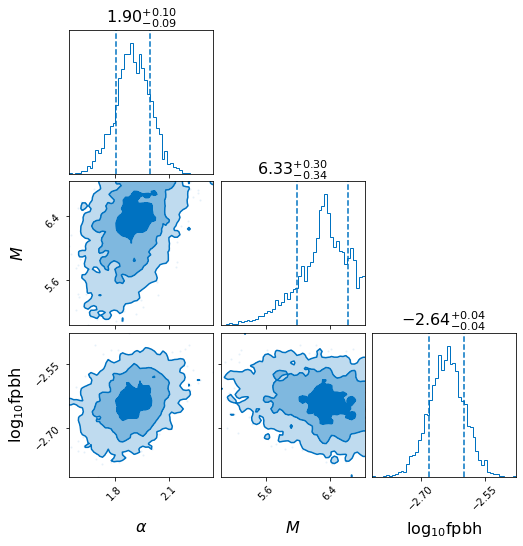

In [18]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [19]:
import numpy as np
np.exp(-1060.368-(-1059.554))

0.4430821880822339

In [20]:
import numpy as np
np.exp(-1776.472-(-1776.722))

1.2840254166877414

In [21]:
10**(-2.59)

0.0025703957827688645

In [33]:
import matplotlib.lines as mlines

outdir1 = "results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2/"
outdir2 = "results/H0_GWTC-3_PBH-power-2nd_flatLCDM_final/"
# outdir2 = "results/H0_GWTC-3_PBH-power-1st_flatLCDM_final/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)


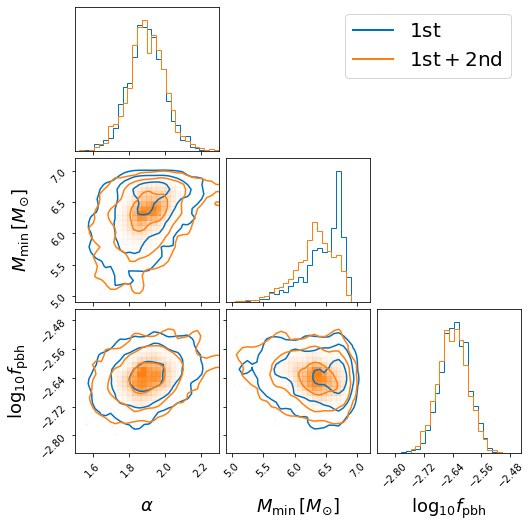

In [35]:
fig = corner.corner(
    posteriors1,
    bins=30,
    smooth=0.9,
    color="#0072C1",
    labels=[
        r"$\alpha$",
        r"$M_\mathrm{min}\, [M_{\odot}]$",
        r"$\log_{10}f_\mathrm{pbh}$",
    ],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=((1.5, 2.3), (4.9, 7.2), (-2.85, -2.45)),
)

corner.corner(
    posteriors2,
    bins=30,
    smooth=0.9,
    color="#FF7F0E",
    labels=[
        r"$\alpha$",
        r"$M_\mathrm{min}\, [M_{\odot}]$",
        r"$\log_{10}f_\mathrm{pbh}$",
    ],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=((1.5, 2.3), (4.9, 7.2), (-2.85, -2.45)),
    fig=fig,
    weights=np.ones(len(posteriors2)) * len(posteriors1) / len(posteriors2),
)

blue_line = mlines.Line2D([], [], color="#0072C1", lw=2, label=r"$\rm{1st}$")
orange_line = mlines.Line2D([], [], color="#FF7F0E", lw=2, label=r"$\rm{1st+2nd}$")
plt.legend(
    handles=[blue_line, orange_line],
    bbox_to_anchor=(1, 3.12),
    loc="upper right",
    fontsize=20,
)  # prop={'size': 8})
plt.savefig("../latex/post-power.pdf")
plt.show()


In [24]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)


In [25]:
posts = posteriors2[:, 0]
get_credibles(posts)

(1.8968388713794937, 0.16798859928019727, 0.16725881830752343)

In [26]:
posts = posteriors2[:, 1]
get_credibles(posts)

(6.334135564767896, 0.4202958553425269, 0.6439579284622425)

In [27]:
posts = posteriors2[:, 2]
get_credibles(posts)

(-2.638603618964569, 0.06697878821181913, 0.07036399189578191)